In [1]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

train_scaled = train_input.reshape(-1, 28, 28, 1) / 255.0

train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)


4422102/4422102 [==============================] - 0s 0us/step


In [3]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu',
                              padding='same', input_shape=(28,28,1)))

model.add(keras.layers.MaxPooling2D(2))

In [4]:
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10, activation='softmax'))

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 100)               627300    
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                        

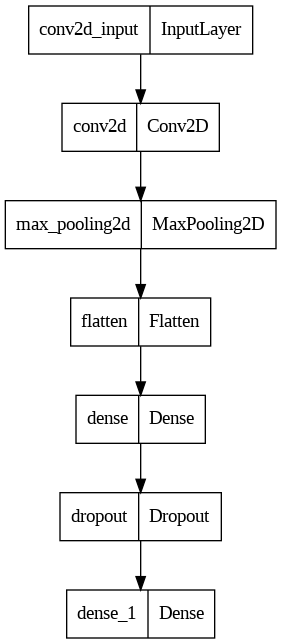

In [6]:
keras.utils.plot_model(model)

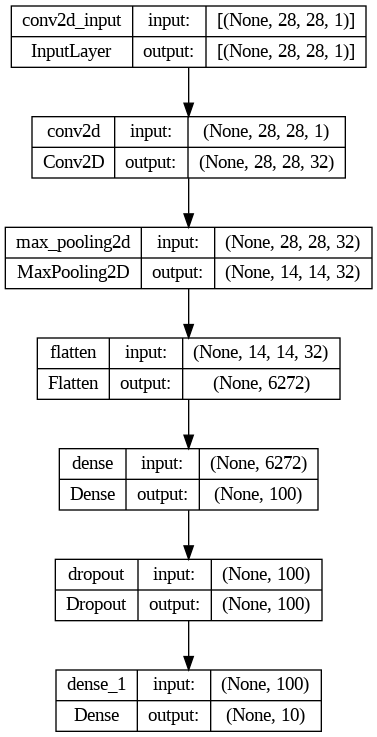

In [7]:
keras.utils.plot_model(model, show_shapes=True)

In [8]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics='accuracy')

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.h5',
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,
                                                  restore_best_weights=True)

history = model.fit(train_scaled, train_target, epochs=20,
                    validation_data=(val_scaled, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
1500/1500 [==============================] - 54s 35ms/step - loss: 0.5304 - accuracy: 0.8147 - val_loss: 0.3332 - val_accuracy: 0.8773
Epoch 2/20


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1500/1500 [==============================] - 48s 32ms/step - loss: 0.3578 - accuracy: 0.8737 - val_loss: 0.2864 - val_accuracy: 0.8919
Epoch 3/20
1500/1500 [==============================] - 37s 25ms/step - loss: 0.3114 - accuracy: 0.8886 - val_loss: 0.2810 - val_accuracy: 0.8956
Epoch 4/20
1500/1500 [==============================] - 36s 24ms/step - loss: 0.2849 - accuracy: 0.8979 - val_loss: 0.2632 - val_accuracy: 0.9008
Epoch 5/20
1500/1500 [==============================] - 37s 25ms/step - loss: 0.2635 - accuracy: 0.9036 - val_loss: 0.2504 - val_accuracy: 0.9063
Epoch 6/20
1500/1500 [==============================] - 38s 26ms/step - loss: 0.2454 - accuracy: 0.9104 - val_loss: 0.2481 - val_accuracy: 0.9088
Epoch 7/20
1500/1500 [==============================] - 36s 24ms/step - loss: 0.2307 - accuracy: 0.9155 - val_loss: 0.2444 - val_accuracy: 0.9121
Epoch 8/20
1500/1500 [==============================] - 36s 24ms/step - loss: 0.2158 - accuracy: 0.9195 - val_loss: 0.2462 - val_accura

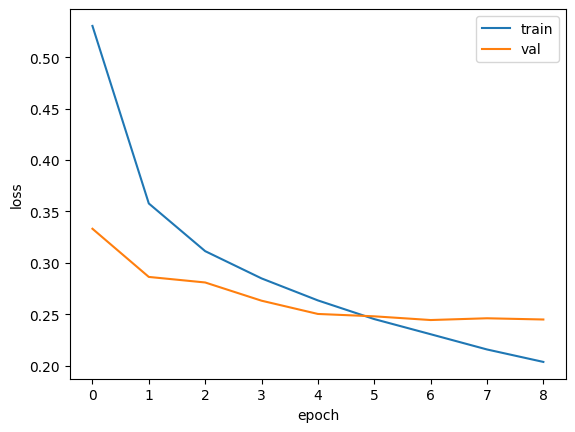

In [9]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [10]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 3s 8ms/step - loss: 0.2444 - accuracy: 0.9121


[0.24444903433322906, 0.9120833277702332]

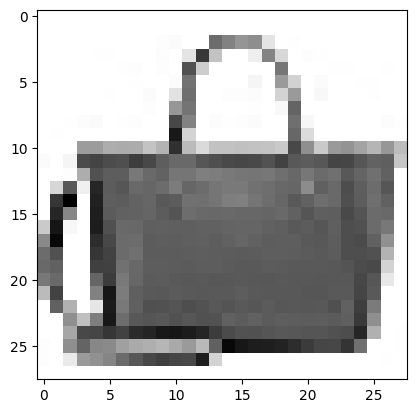

In [11]:
plt.imshow(val_scaled[0].reshape(28, 28), cmap='gray_r')
plt.show()

In [12]:
preds = model.predict(val_scaled[0:1])
preds

1/1 [==============================] - 0s 143ms/step


array([[1.5566957e-16, 8.9405905e-22, 8.7644507e-15, 2.9311226e-16,
        8.4782543e-15, 5.8571908e-14, 1.4933065e-16, 5.4372193e-15,
        1.0000000e+00, 1.1335629e-16]], dtype=float32)

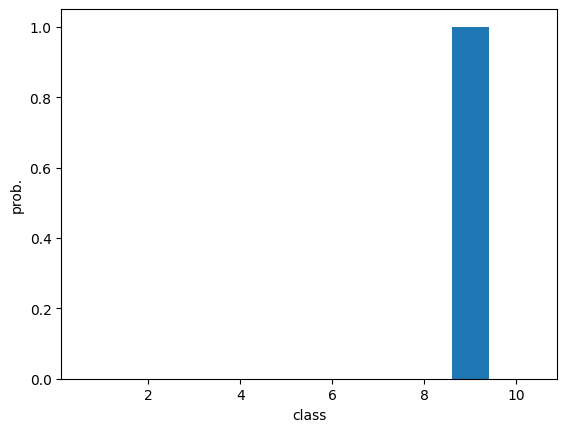

In [13]:
plt.bar(range(1, 11), preds[0])
plt.xlabel('class')
plt.ylabel('prob.')
plt.show()

In [14]:
classes = ['티셔츠', '바지', '스웨터', '드레스', '코트',
           '샌달', '셔츠', '스니커즈', '가방', '앵클 부츠']

In [15]:
import numpy as np
print(classes[np.argmax(preds)])

가방


In [16]:
test_scaled = test_input.reshape(-1, 28, 28, 1) / 255.0

In [17]:
model.evaluate(test_scaled, test_target)

313/313 [==============================] - 2s 7ms/step - loss: 0.2639 - accuracy: 0.9069


[0.26390478014945984, 0.9068999886512756]